# Objective
Cluster customers based on spending habits and propose marketing strategies tailored to each segment.

In [20]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# Dataset
Dataset Name: Mall Customers Dataset

Source: Kaggle.

Target Variable: None – This dataset is typically used for customer segmentation (unsupervised learning).

Features:

- CustomerID – Unique identifier for each customer.
- Gender – Gender of the customer (Male, Female).
- Age – Age of the customer (in years).
- Annual Income (k\$) – Annual income of the customer (in thousands).
- Spending Score (1–100) – Score assigned by the mall based on customer behavior and spending patterns.

In [21]:
# Load dataset
df = pd.read_csv('Mall_Customers.csv')  
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
#Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       200 non-null    int64 
 1   Gender           200 non-null    object
 2   Age              200 non-null    int64 
 3   Annual_Income_k  200 non-null    int64 
 4   Spending_Score   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [28]:
df.describe()

,CustomerID,Age,Annual_Income_k,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [36]:
#Renaming columns 
df.rename(columns={'Annual Income (k$)': 'Annual_Income_k',
                   'Spending Score (1-100)': 'Spending_Score',
                   'Genre': 'Gender'}, inplace=True)

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

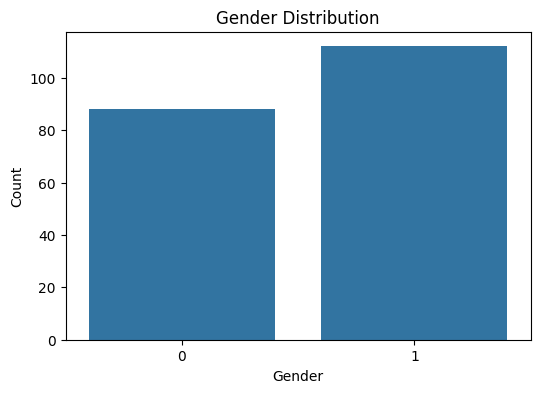

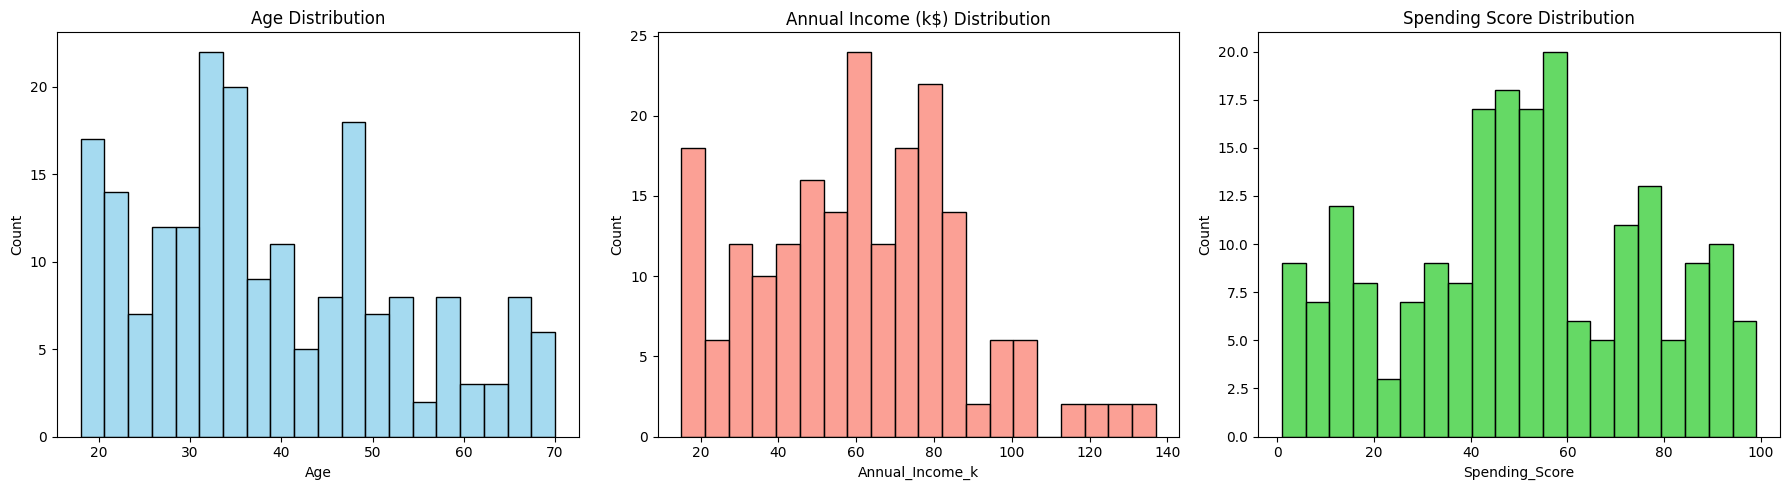

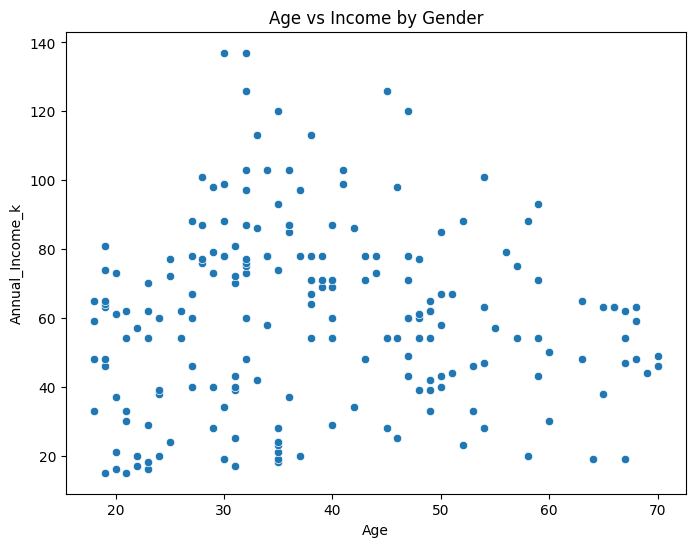

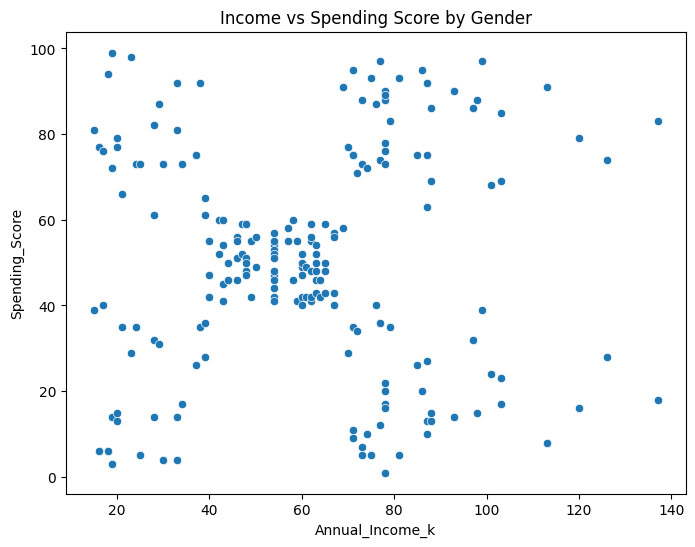

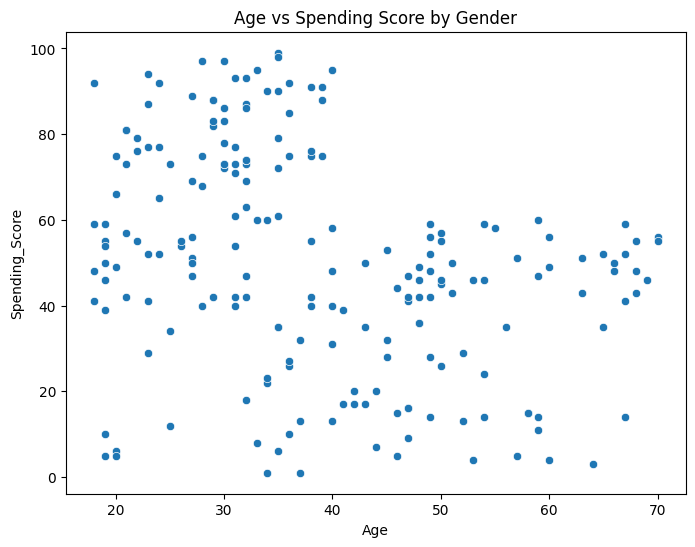

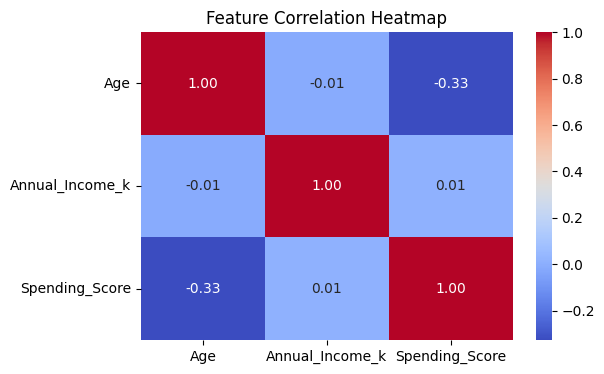

In [37]:
#1. Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#2. Age, Income, Spending Score Distributions
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Age'], bins=20, color='skyblue', ax=axs[0])
axs[0].set_title('Age Distribution')

sns.histplot(df['Annual_Income_k'], bins=20, color='salmon', ax=axs[1])
axs[1].set_title('Annual Income (k$) Distribution')

sns.histplot(df['Spending_Score'], bins=20, color='limegreen', ax=axs[2])
axs[2].set_title('Spending Score Distribution')

plt.tight_layout()
plt.show()

#3. Age vs Income
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Annual_Income_k')
plt.title("Age vs Income by Gender")
plt.show()

#4. Income vs Spending Score 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual_Income_k', y='Spending_Score')
plt.title("Income vs Spending Score by Gender")
plt.show()

#5. Age vs Spending Score 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Spending_Score')
plt.title("Age vs Spending Score by Gender")
plt.show()

#6. Correlation Heatmap 
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Age', 'Annual_Income_k', 'Spending_Score']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [38]:
#Features for clustering
features = ['Gender', 'Age', 'Annual_Income_k', 'Spending_Score']

#Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

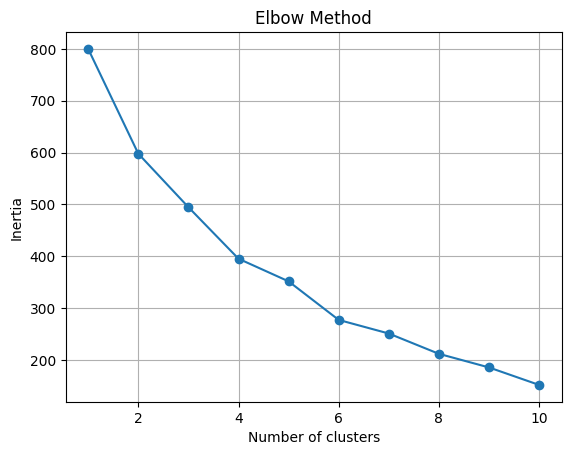

Silhouette Score: 0.27191023466188324


In [43]:
#Finding optimal number of clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

#Apply KMeans with optimal K
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

#Evaluate with Silhouette Score
score = silhouette_score(scaled_features, df['Cluster'])
print("Silhouette Score:", score)

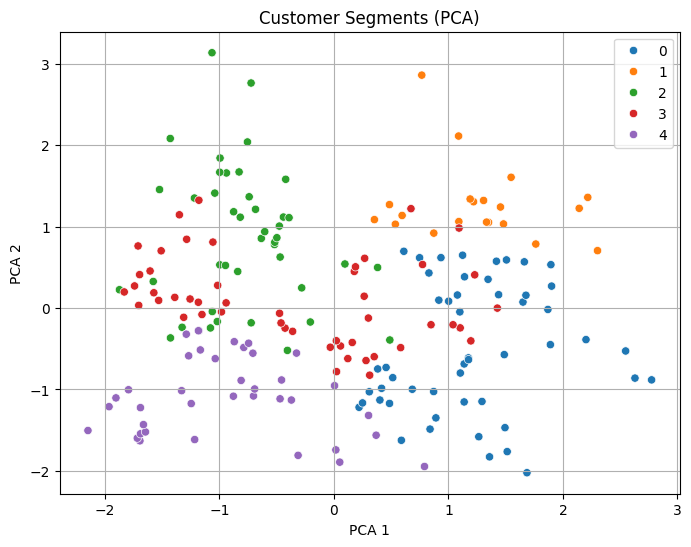

In [44]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='tab10')
plt.title('Customer Segments (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid()
plt.show()

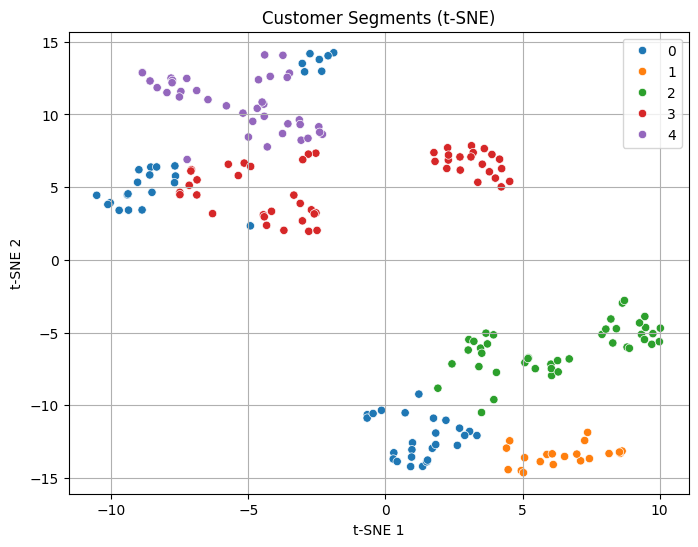

In [46]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], hue=df['Cluster'], palette='tab10')
plt.title('Customer Segments (t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.grid()
plt.show()

In [47]:
# Group by cluster and take the mean of features
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
display(cluster_summary)

,Gender,Age,Annual_Income_k,Spending_Score
Cluster,,,,
0,0.49,56.47,46.10,39.31
1,0.00,39.50,85.15,14.05
2,0.00,28.69,60.90,70.24
3,1.00,37.90,82.12,54.45
4,1.00,27.32,38.84,56.21


# Conclusion -
Key Insights:

- Distinct Customer Segments Identified: Using K-Means Clustering, the customer base was segmented into clear groups based on Annual Income and Spending Score. This allows for targeted marketing strategies tailored to each group.
- High-Spending Customers with Moderate Income: One cluster included customers with average income but very high spending scores. These customers are ideal targets for premium or loyalty campaigns due to their high engagement.
- Low-Spending Customers with High Income: Another segment showed high earners with low spending scores, indicating potential customers who could be encouraged to engage more through promotions or personalized offers.
- Young Shoppers Spend More: Younger customers, especially those in the age range of 18–35, showed a higher tendency to spend, suggesting they are more responsive to trends and marketing efforts.
- Clustering Improves Business Strategy: The segmentation helps in identifying priority customer groups, personalizing offers, optimizing resource allocation, and improving customer satisfaction and retention.
- Visual Patterns Confirm Cluster Validity: The 2D cluster plots showed well-separated groups, validating that the segmentation approach (K-Means with optimal K found via Elbow Method) was effective.